[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Niedermeier_et_al_2014/fig_2.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Niedermeier_et_al_2014/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Niedermeier_et_al_2014/fig_2.ipynb)

#### based on Fig. 2 from Niedermeier et al. 2014 (Geophys. Res. Lett. 41)  "_A computationally efficient description of heterogeneous freezing: A simplified version of the Soccer ball model_"   
https://doi.org/10.1002/2013GL058684

In [4]:
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from scipy.constants import convert_temperature
from PySDM import Formulae
from PySDM.physics import si
from PySDM_examples.Niedermeier_et_al_2014 import Settings, Simulation

In [2]:
formulae = Formulae(
    heterogeneous_ice_nucleation_rate='ABIFM',
    particle_shape_and_density="MixedPhaseSpheres",
    constants = {
        'ABIFM_M': 70,
        'ABIFM_C': -10
    }
)

output = []
for T0 in (convert_temperature(TC, 'Celsius', 'Kelvin') for TC in (-19, -23)):
    settings = Settings(
        in_sampling_n=1800,
        initial_temperature=T0 * si.K,
        timestep=1 * si.s,
        formulae=formulae
    )
    simulation = Simulation(settings)
    output.append(simulation.run())

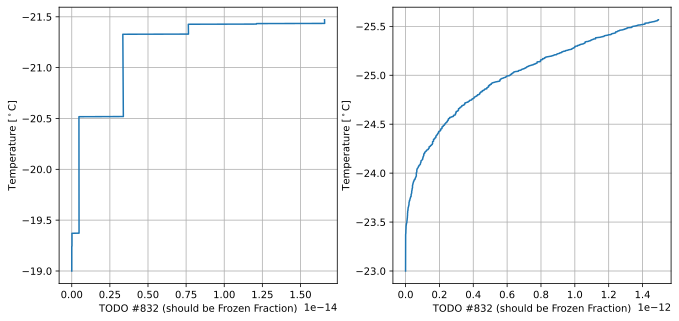

HTML(value="<a href='./fig_2.pdf' target='_blank'>./fig_2.pdf</a><br>")

In [3]:
_, axs = pyplot.subplots(1, 2, figsize=(11, 5))
for i, ax in enumerate(axs):
    ax.grid()
    ax.plot(output[i]['ice water content'], convert_temperature(output[i]['T'], 'Kelvin', 'Celsius'))
    ax.invert_yaxis()
    ax.set_ylabel(r'Temperature [$^\circ$C]')
    ax.set_xlabel('TODO #832 (should be Frozen Fraction)')
show_plot('fig_2.pdf')